In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [101]:
conn=sqlite3.connect('inventory.db')

df=pd.read_sql_query("select * from vendor_sales_compressed",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalSalesDollars,TotalSalesQuantity,TotalSalesPrice,TotalPurchaseDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,36343.0,220509.77,1308899.57,66775.19,68601.68,2502352.03,65.656962,-108737.0,2.911798
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,36721.0,180561.96,1091303.95,67470.21,144929.24,2712737.27,71.311984,-127317.0,3.485776
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,44227.0,156407.50,1113747.23,81261.84,123780.22,2304556.45,67.418131,-143180.0,3.069192
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,70913.0,144107.28,1577829.87,130297.52,257032.07,1683368.07,51.618089,-130769.0,2.066888
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,36116.0,175999.67,1121420.84,66358.52,257032.07,1901785.17,62.906238,-101993.0,2.695871


In [102]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,201359.00
Brand,10692.0,1.803923e+04,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,90631.00
PurchasePrice,10692.0,2.438530e+01,109.269375,0.360000,6.840000,10.455000,19.482500,5681.81
ActualPrice,10692.0,3.564367e+01,148.246016,0.490000,10.990000,15.990000,28.990000,7499.99
Volume,10692.0,8.473605e+02,664.309212,50.000000,750.000000,750.000000,750.000000,20000.00
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.000000,36.000000,262.000000,1975.750000,337660.00
TotalSalesDollars,10692.0,3.010669e+04,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3811251.60
TotalSalesQuantity,10692.0,8.344822e+02,3148.528034,0.000000,1.000000,48.000000,469.000000,104145.00
TotalSalesPrice,10692.0,5.395459e+03,13787.637588,0.000000,9.990000,509.745000,4243.317500,220509.77
TotalPurchaseDollars,10692.0,1.117463e+04,44048.445725,0.000000,27.980000,976.090000,7364.572500,1577829.87


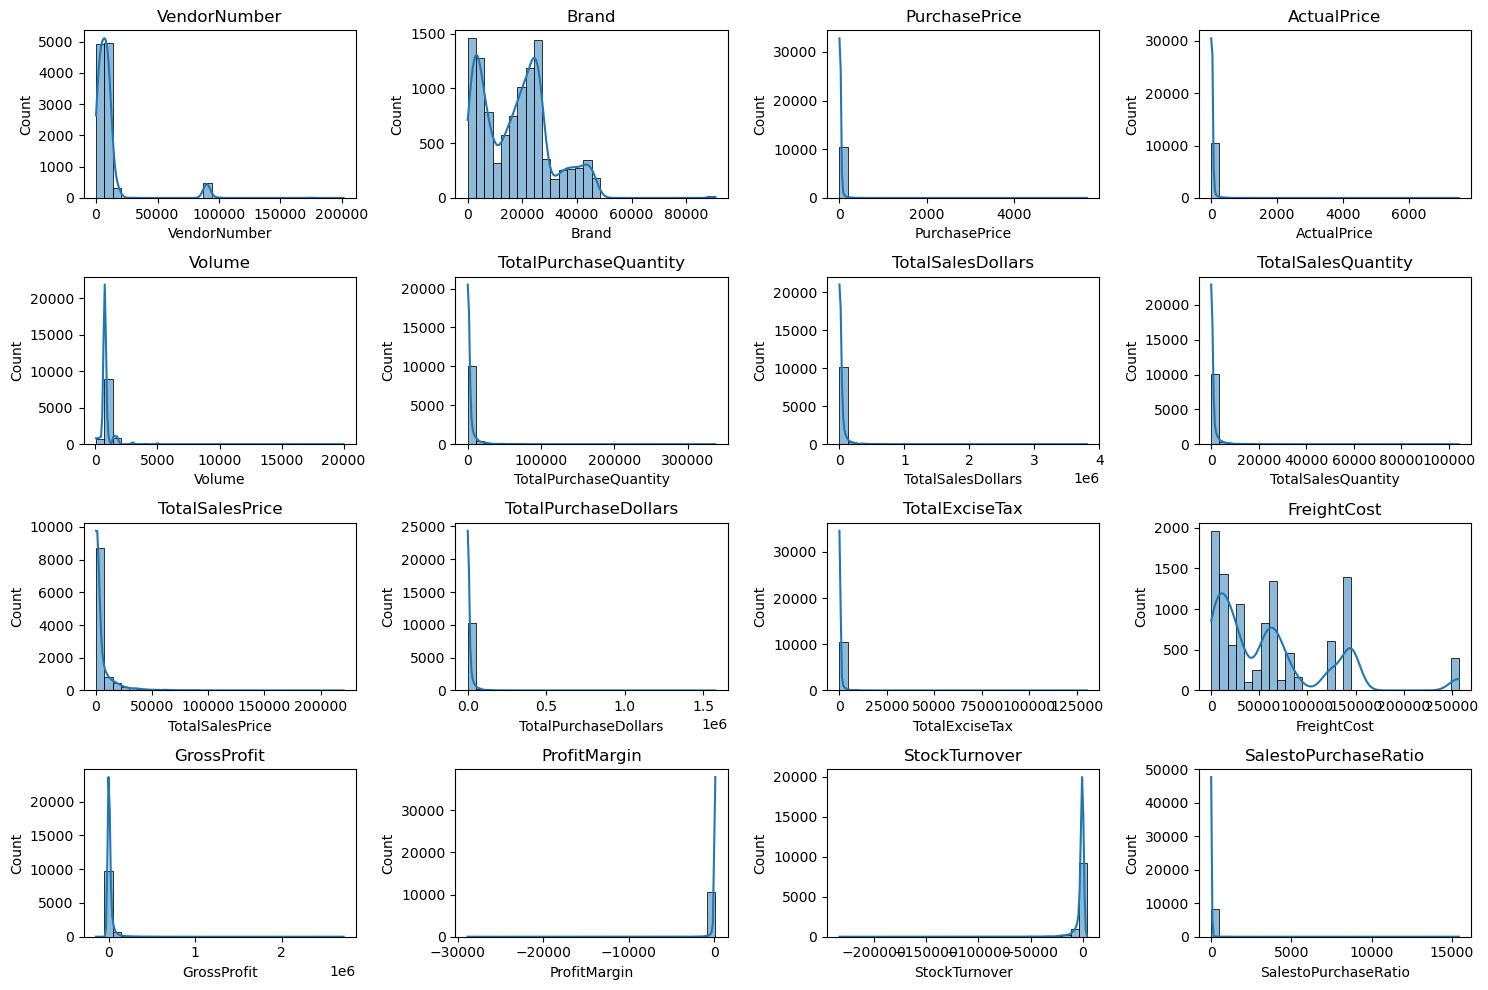

In [103]:
#Distribution PLot for Numerical Columns
numerical_cols= df.select_dtypes (include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df [col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

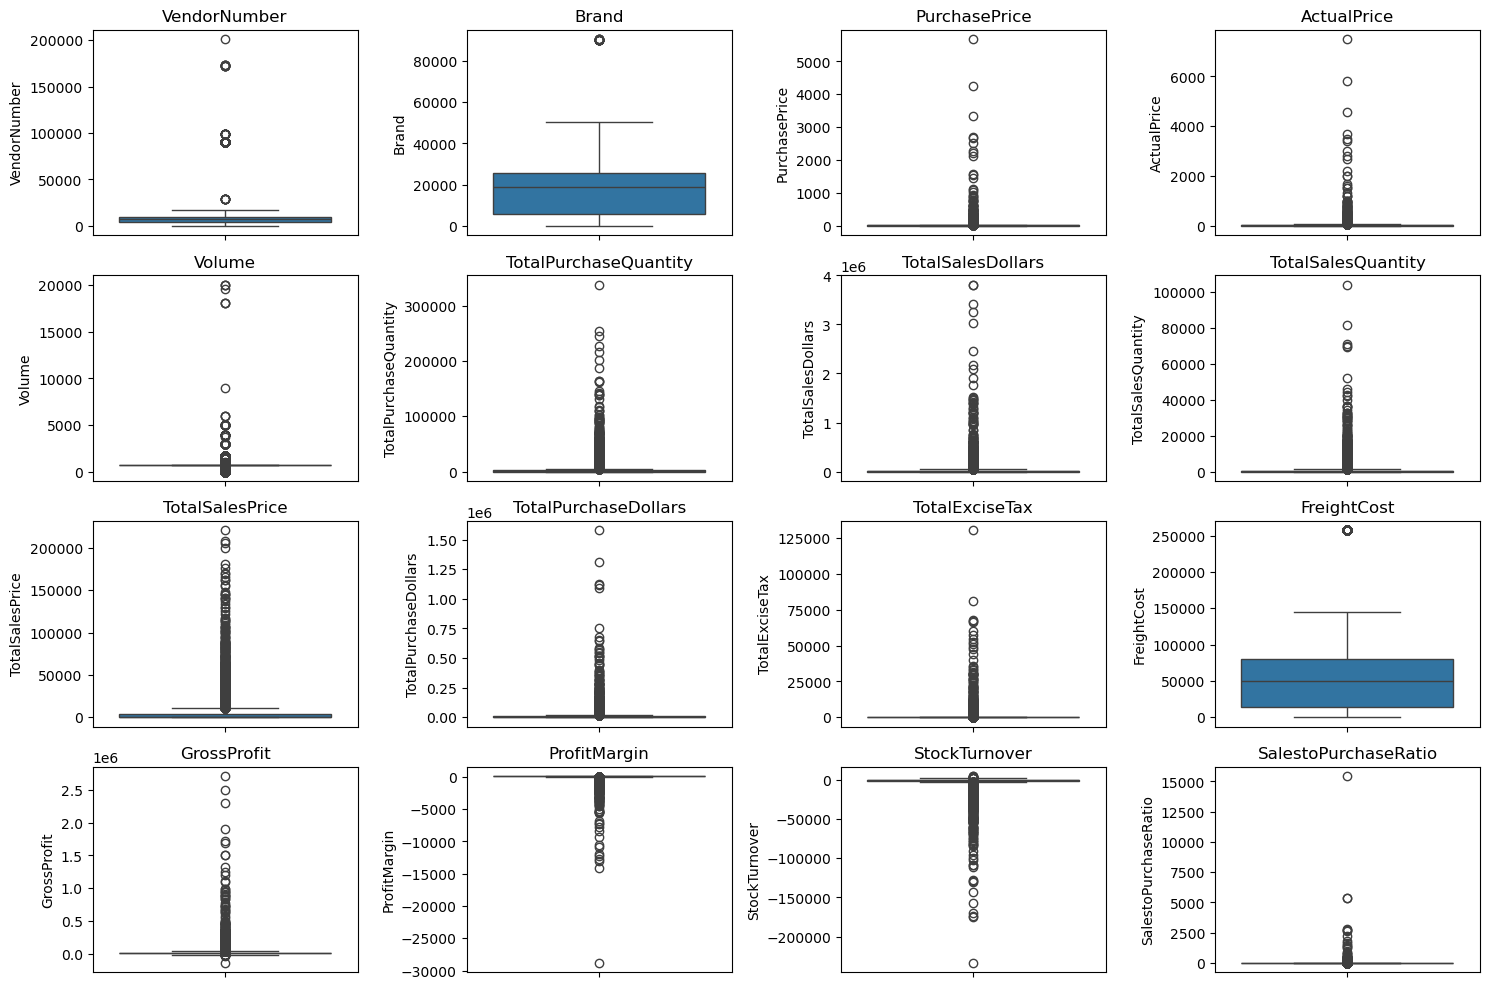

In [104]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [105]:
# lets filter the data by removing inconsistences
df=pd.read_sql_query("""SELECT *
FROM vendor_sales_compressed
WHERE GrossProfit>0
AND ProfitMargin>0
AND TotalSalesQuantity >0""",conn)

In [106]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalSalesDollars,TotalSalesQuantity,TotalSalesPrice,TotalPurchaseDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,36343.0,220509.77,1308899.57,66775.19,68601.68,2502352.03,65.656962,-108737.0,2.911798
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,36721.0,180561.96,1091303.95,67470.21,144929.24,2712737.27,71.311984,-127317.0,3.485776
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,44227.0,156407.50,1113747.23,81261.84,123780.22,2304556.45,67.418131,-143180.0,3.069192
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,70913.0,144107.28,1577829.87,130297.52,257032.07,1683368.07,51.618089,-130769.0,2.066888
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,36116.0,175999.67,1121420.84,66358.52,257032.07,1901785.17,62.906238,-101993.0,2.695871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553,3252,E & J GALLO WINERY,23566,Vin Vault Red,7.23,18.99,3000.0,6,43.38,1.0,10.49,10.49,0.45,61966.91,32.89,75.818349,-5.0,4.135367
6554,12546,JIM BEAM BRANDS COMPANY,923,DeKuyper Peach Pucker,9.92,12.99,1000.0,4,39.68,1.0,12.99,12.99,1.05,123880.97,26.69,67.263105,-3.0,3.054657
6555,653,STATE WINE & SPIRITS,20165,Bonal Apertif,12.25,18.99,750.0,3,36.75,1.0,18.99,18.99,0.11,8014.98,17.76,48.326531,-2.0,1.935229
6556,9552,M S WALKER INC,20257,Zerran Tinto Montsant,10.45,15.99,750.0,3,31.35,2.0,27.98,27.98,0.22,55551.82,3.37,10.749601,-1.0,1.120443


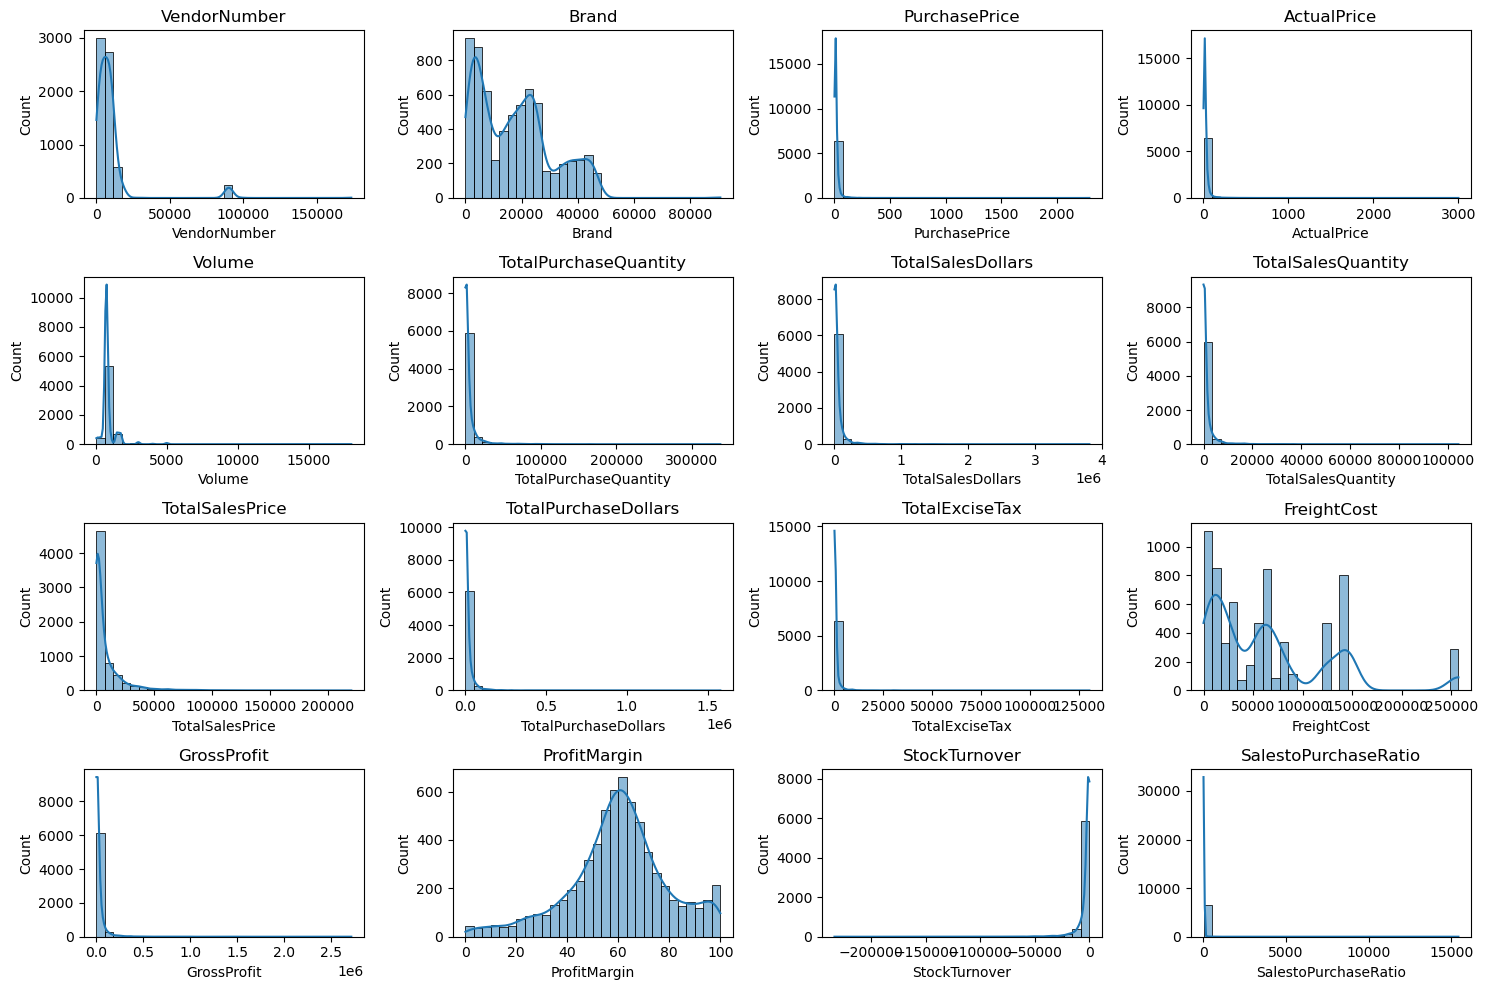

In [107]:
numerical_cols= df.select_dtypes (include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df [col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

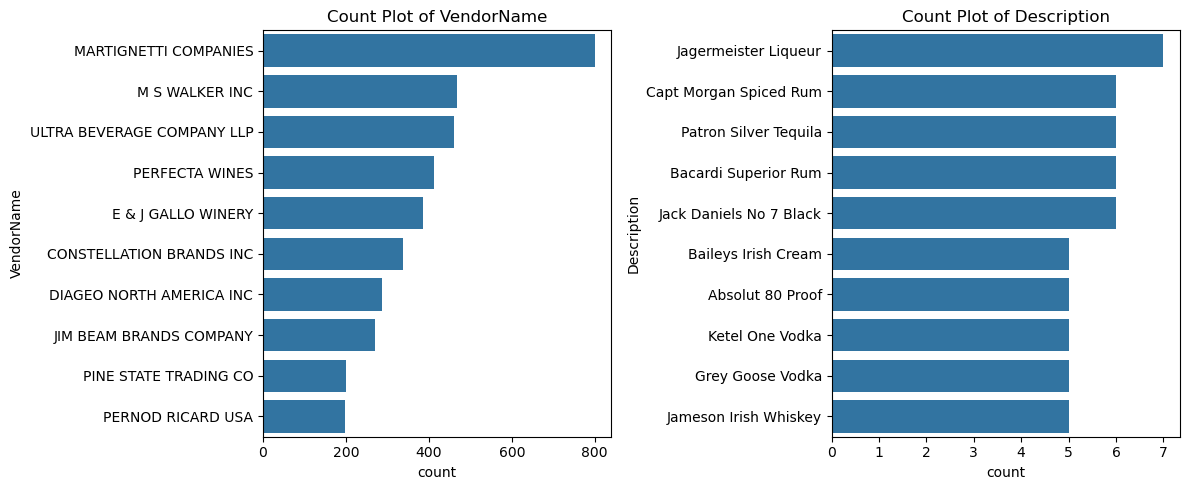

In [108]:
# Count Plots for categorical Data
categorical_cols=["VendorName","Description"]
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

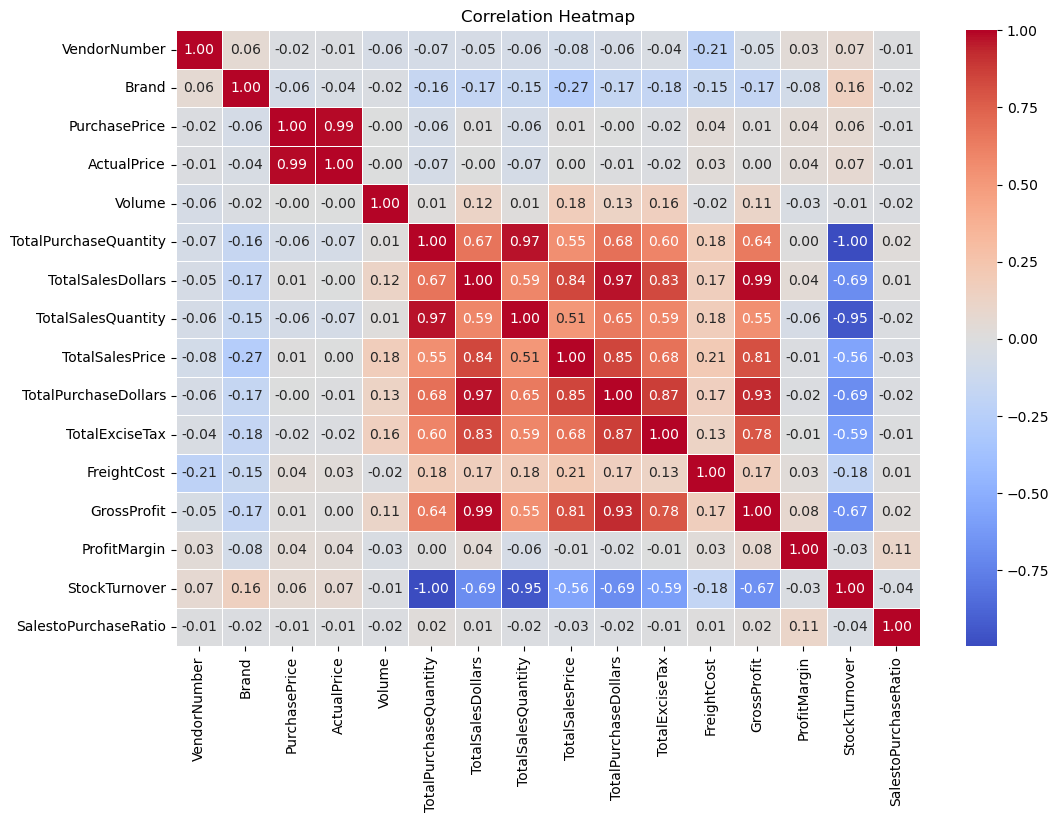

In [109]:
# Correlation
plt.figure(figsize=(12, 8))
correlation_matrix =df [numerical_cols].corr()
sns.heatmap(correlation_matrix, annot= True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [110]:
# IDENTIFY BRANDS THAT NEED PROMOTIONAL OR PRICING ADJUSTMENTS WHICH EXIBIT  LOWER SALES PERFORMANCE BUT HIGHER PROFIT MARGINS.


In [111]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [112]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [113]:
float(low_sales_threshold)

884.7459999999999

In [114]:
float(high_margin_threshold)

79.46148595890597

In [115]:
#Filter brands with low sales but high profit margins
target_brands= brand_performance[
(brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
(brand_performance['ProfitMargin']>= high_margin_threshold)
    ]
print("Brands with Low Sales but High Profit Margins:")

display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
3773,Montezuma Triple Sec,47.76,88.316583
346,Backhouse Pnt Grigio,47.88,83.312448
130,Allen's Peach Schnapps,56.03,89.309299
981,Caposaldo Pnt Grigio Veneto,71.40,87.408964
3220,La Terre Merlot,76.92,87.662507
...,...,...,...
1216,Ch Le Bon Pasteur 10 Brdx,838.90,85.100727
4294,Pol Roger Rose 02 Brut,855.44,81.766109
3722,Mirassou Sunset Red,862.27,96.293504
1872,Douglass Hill Chard,868.32,83.443892


In [116]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<1000] # for better visualization

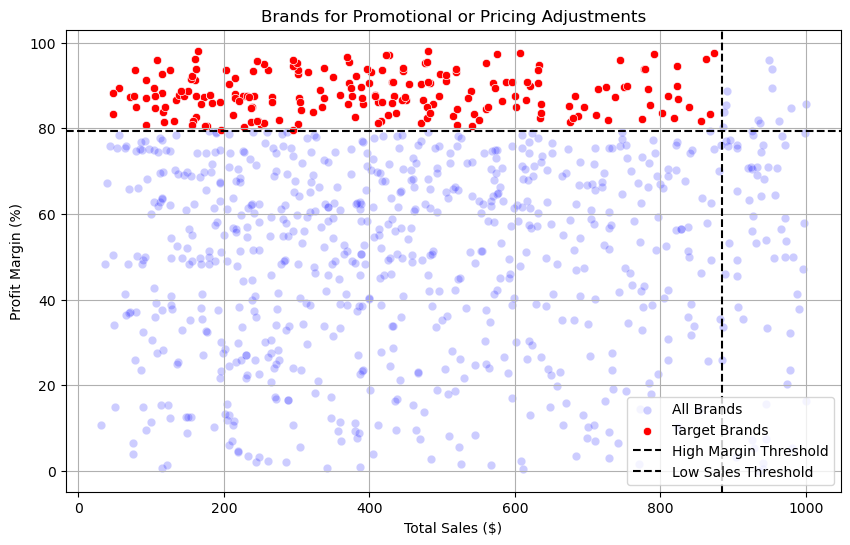

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [118]:
# WHICH VENDOR & BRANDS DEMONSTRATE THE HIGHEST SALE PERFORMANCE

In [119]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value>= 1_000:
        return f"{value /1_000:.2f}K"
    else:
        return str(value)

In [120]:
#top vendor and brands by sales performance
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors


VendorName
DIAGEO NORTH AMERICA INC      49892697.20
MARTIGNETTI COMPANIES         25417197.61
PERNOD RICARD USA             23984127.69
JIM BEAM BRANDS COMPANY       23276938.56
BACARDI USA INC               17345446.68
CONSTELLATION BRANDS INC      15275765.41
BROWN-FORMAN CORP             13176164.44
E & J GALLO WINERY            11893276.41
ULTRA BEVERAGE COMPANY LLP    11172249.29
M S WALKER INC                 9634192.19
Name: TotalSalesDollars, dtype: float64

In [121]:
top_brands

Description
Jack Daniels No 7 Black    5824785.16
Tito's Handmade Vodka      5618629.32
Grey Goose Vodka           5263604.97
Absolut 80 Proof           4645700.09
Capt Morgan Spiced Rum     4622934.50
Jameson Irish Whiskey      4309364.40
Ketel One Vodka            3673961.52
Baileys Irish Cream        2930331.42
Kahlua                     2716093.65
Tanqueray                  2486277.10
Name: TotalSalesDollars, dtype: float64

In [122]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    5.82M
Tito's Handmade Vodka      5.62M
Grey Goose Vodka           5.26M
Absolut 80 Proof           4.65M
Capt Morgan Spiced Rum     4.62M
Jameson Irish Whiskey      4.31M
Ketel One Vodka            3.67M
Baileys Irish Cream        2.93M
Kahlua                     2.72M
Tanqueray                  2.49M
Name: TotalSalesDollars, dtype: object

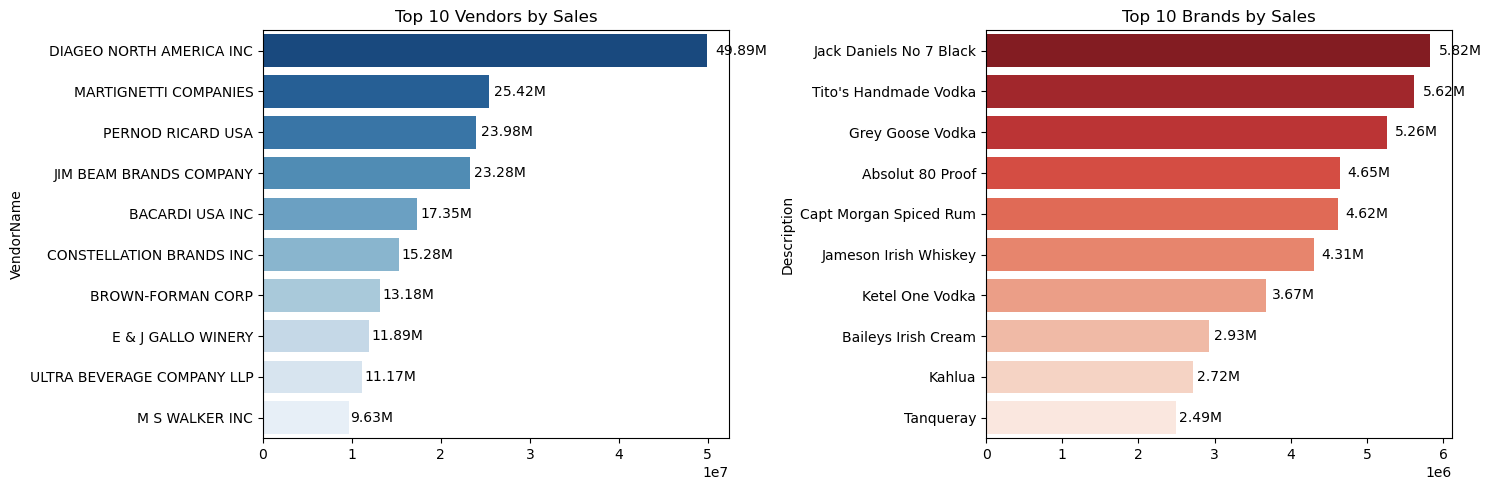

In [123]:
plt.figure(figsize=(15,5))

#Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1= sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()), 
        ha='left', va='center', fontsize=10, color='black') 

#Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 =sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() *0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black')
    
plt.tight_layout()
plt.show()

In [124]:
# WHICH VENDORS CONTRIBUTE THE MOST TO TOTALPURCHASEDOLLARS

In [125]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()                                     

In [126]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [127]:
vendor_performance= round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [128]:
#Display Top 10 Vendors

top_vendors= vendor_performance.head(10)
top_vendors  ['TotalSalesDollars'] = top_vendors ['TotalSalesDollars'].apply(format_dollars)
top_vendors ['TotalPurchaseDollars'] = top_vendors ['TotalPurchaseDollars'].apply(format_dollars)
top_vendors ['GrossProfit'] = top_vendors ['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
24,DIAGEO NORTH AMERICA INC,17.67M,32.23M,49.89M,15.50
55,MARTIGNETTI COMPANIES,9.21M,16.21M,25.42M,8.08
44,JIM BEAM BRANDS COMPANY,8.55M,14.73M,23.28M,7.50
66,PERNOD RICARD USA,8.38M,15.60M,23.98M,7.35
19,CONSTELLATION BRANDS INC,6.65M,8.62M,15.28M,5.84
6,BACARDI USA INC,5.73M,11.61M,17.35M,5.03
29,E & J GALLO WINERY,5.09M,6.81M,11.89M,4.46
11,BROWN-FORMAN CORP,4.88M,8.29M,13.18M,4.29
101,ULTRA BEVERAGE COMPANY LLP,4.09M,7.08M,11.17M,3.59
51,M S WALKER INC,4.03M,5.61M,9.63M,3.53


In [129]:
float(top_vendors['PurchaseContribution%'].sum())

65.17

In [130]:
top_vendors['Cumilative_Contribution%']= top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumilative_Contribution%
24,DIAGEO NORTH AMERICA INC,17.67M,32.23M,49.89M,15.50,15.50
55,MARTIGNETTI COMPANIES,9.21M,16.21M,25.42M,8.08,23.58
44,JIM BEAM BRANDS COMPANY,8.55M,14.73M,23.28M,7.50,31.08
66,PERNOD RICARD USA,8.38M,15.60M,23.98M,7.35,38.43
19,CONSTELLATION BRANDS INC,6.65M,8.62M,15.28M,5.84,44.27
6,BACARDI USA INC,5.73M,11.61M,17.35M,5.03,49.30
29,E & J GALLO WINERY,5.09M,6.81M,11.89M,4.46,53.76
11,BROWN-FORMAN CORP,4.88M,8.29M,13.18M,4.29,58.05
101,ULTRA BEVERAGE COMPANY LLP,4.09M,7.08M,11.17M,3.59,61.64
51,M S WALKER INC,4.03M,5.61M,9.63M,3.53,65.17


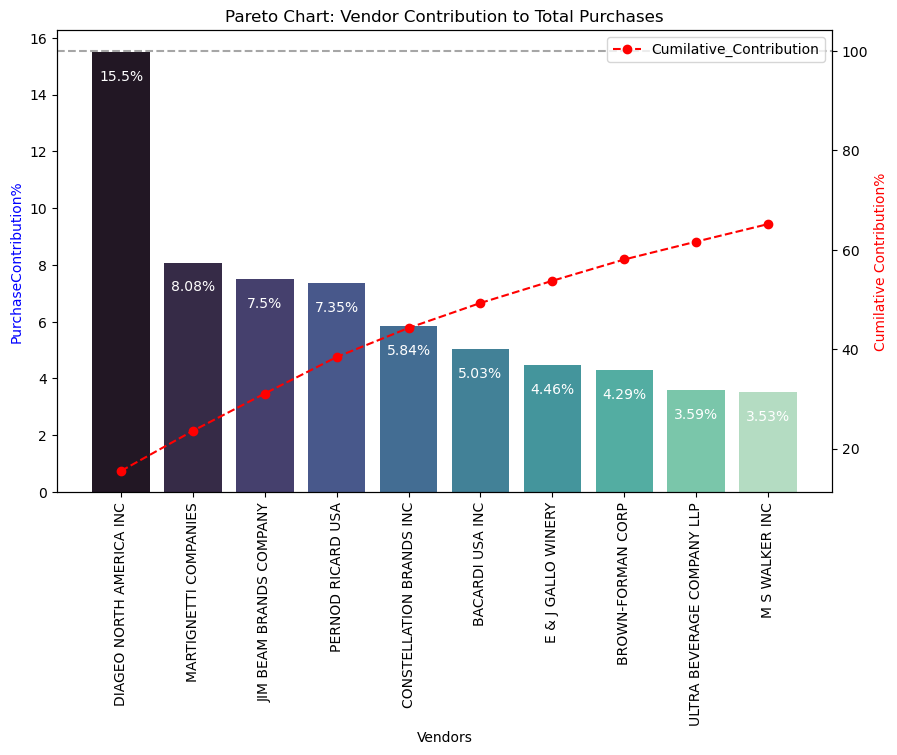

In [131]:
fig, ax1= plt.subplots(figsize=(10, 6))
#Bar plot for Purchase Contributions
sns.barplot(x=top_vendors ['VendorName'], y=top_vendors ['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value -1, str(value)+'%', ha='center', fontsize=10, color='white')
#Line Plot for Cumulative Contribution
ax2 =ax1.twinx()
ax2.plot(top_vendors ['VendorName'], top_vendors['Cumilative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumilative_Contribution')

ax1.set_xticklabels (top_vendors ['VendorName'], rotation=90)
ax1.set_ylabel('PurchaseContribution%', color ='blue')
ax2.set_ylabel('Cumilative Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100,color='grey',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [132]:
# HOW MUCH OF TOTAL PROCUREMENT IS DEPENDENT ON THE TOP VENDORS

In [133]:
print(f"Total Contribution of Top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Contribution of Top 10 vendors is 65.17%


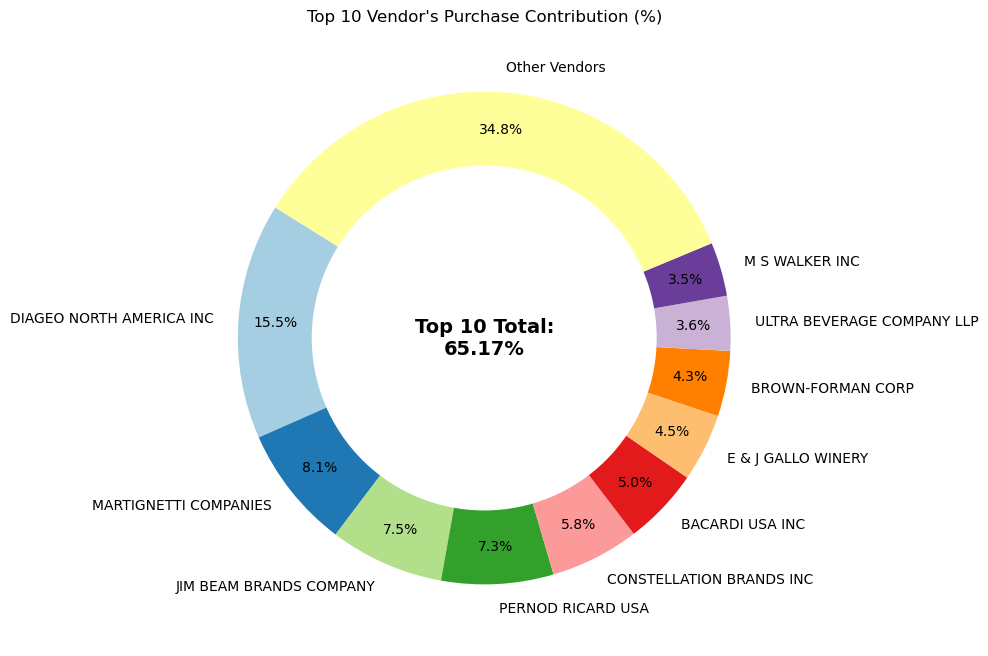

In [134]:
# vendors = list(top_vendors ['VendorName'].values)
# purchase_contributions = list(top_vendors ['PurchaseContribution%'].values)
# total_contribution = sum(purchase_contributions)
# remaining_contribution = 100 - total_contribution
 
# #Append "Other Vendors" category
# vendors.append("Other Vendors") purchase_contributions.append(remaining_contribution)
# purchase_contributions.append(remaining_contrbutions)
# #Donut Chart
# fig, ax plt.subplots(figsize=(8, 8))
# wedges, texts, autotexts= ax.pie(purchase_contributions, labels= vendors, autopct='%1.1f%', startangle 140, pctdistance=0.85, colors= plt.cm.Paired.colors)

# #Draw a white circle in the center to create a "donut" effect
# centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# fig.gca().add_artist(centre_circle)

# #Add Total Contribution annotation in the center
# plt.text(0, 0, f"Top 10 Total:\n{total_contribution: .2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

# plt.title("Top 10 Vendor's Purchase Contribution (%)")
# plt.show()

# Data
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=148,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 0, 
    f"Top 10 Total:\n{total_contribution:.2f}%", 
    fontsize=14, 
    fontweight='bold', 
    ha='center', 
    va='center'
)

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


In [135]:
# DOES PURCHASING IN BULK REDUCE THE UNIT PRICE , AND WHAT IS THE OPTIMAL PURCHASE VOLUME FOR COST SAVING 

In [136]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [137]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalSalesDollars,TotalSalesQuantity,TotalSalesPrice,TotalPurchaseDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,36343.0,220509.77,1308899.57,66775.19,68601.68,2502352.03,65.656962,-108737.0,2.911798,9.021916
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,36721.0,180561.96,1091303.95,67470.21,144929.24,2712737.27,71.311984,-127317.0,3.485776,6.652751
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,44227.0,156407.50,1113747.23,81261.84,123780.22,2304556.45,67.418131,-143180.0,3.069192,5.942933
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,70913.0,144107.28,1577829.87,130297.52,257032.07,1683368.07,51.618089,-130769.0,2.066888,7.823355
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,36116.0,175999.67,1121420.84,66358.52,257032.07,1901785.17,62.906238,-101993.0,2.695871,8.119824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553,3252,E & J GALLO WINERY,23566,Vin Vault Red,7.23,18.99,3000.0,6,43.38,1.0,10.49,10.49,0.45,61966.91,32.89,75.818349,-5.0,4.135367,1.748333
6554,12546,JIM BEAM BRANDS COMPANY,923,DeKuyper Peach Pucker,9.92,12.99,1000.0,4,39.68,1.0,12.99,12.99,1.05,123880.97,26.69,67.263105,-3.0,3.054657,3.247500
6555,653,STATE WINE & SPIRITS,20165,Bonal Apertif,12.25,18.99,750.0,3,36.75,1.0,18.99,18.99,0.11,8014.98,17.76,48.326531,-2.0,1.935229,6.330000
6556,9552,M S WALKER INC,20257,Zerran Tinto Montsant,10.45,15.99,750.0,3,31.35,2.0,27.98,27.98,0.22,55551.82,3.37,10.749601,-1.0,1.120443,9.326667


In [138]:
df['OrderSize']=pd.qcut(df['TotalPurchaseQuantity'], q=3,labels=["Small","Medium", "Large"])

In [139]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,10.729812
Medium,5.295694
Large,3.942704


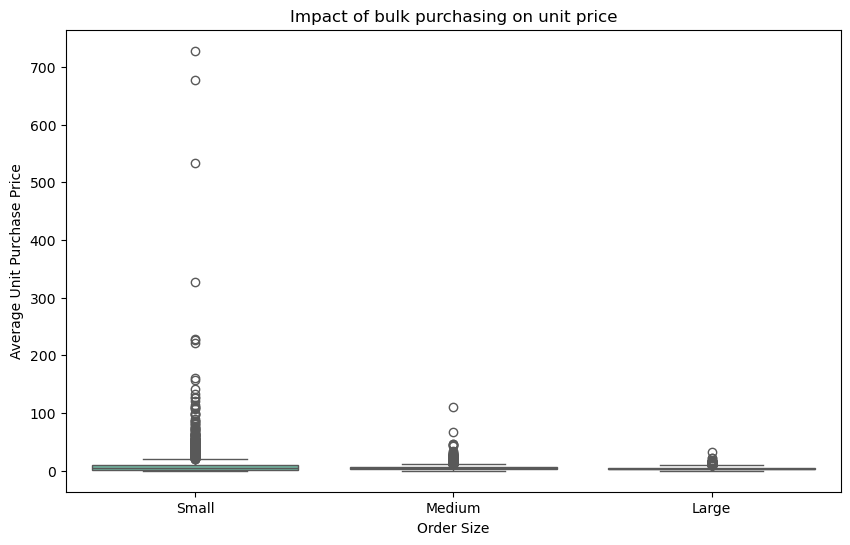

In [140]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of bulk purchasing on unit price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [141]:
# which vendor have low inventory turnover ,indicating excess stock and slow moving products 

In [142]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
DIAGEO NORTH AMERICA INC,-13233.526132
MAJESTIC FINE WINES,-12993.259259
SIDNEY FRANK IMPORTING CO,-12876.800000
DISARONNO INTERNATIONAL LLC,-10684.714286
SAZERAC CO INC,-9989.695652
BACARDI USA INC,-8836.043103
BROWN-FORMAN CORP,-8424.529412
OLE SMOKY DISTILLERY LLC,-7515.214286
MANGO BOTTLING INC,-7003.250000


In [143]:
# HOW MUCH CAPITAL IS LOCKED IN UNSOLD INVENTORY PER VENDOR , AND WHICH VENDORS CONTRIBUTE THE MOST OF IT  

In [144]:
df["UnsoldInventoryValue"] = (df ["TotalPurchaseQuantity"] - df ["TotalSalesQuantity"]) *df ["PurchasePrice"]
print('Total Unsold Capital:', format_dollars (df ["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 228.51M


In [145]:
inventory_value_per_vendor = df.groupby ("VendorName") ["UnsoldInventoryValue"].sum().reset_index()

#Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor =inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor ['UnsoldInventoryValue'] = inventory_value_per_vendor ['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
24,DIAGEO NORTH AMERICA INC,37.22M
55,MARTIGNETTI COMPANIES,19.55M
66,PERNOD RICARD USA,17.94M
44,JIM BEAM BRANDS COMPANY,17.10M
6,BACARDI USA INC,13.48M
19,CONSTELLATION BRANDS INC,11.21M
11,BROWN-FORMAN CORP,9.71M
29,E & J GALLO WINERY,8.67M
101,ULTRA BEVERAGE COMPANY LLP,8.39M
59,MOET HENNESSY USA INC,7.20M


In [146]:
# WHAT IS THE CONFIDENCE LEVEL FOR PROFIT MARGINS OF TOP-PERFORMING AND LOW-PERFORMING VENDORS 

In [147]:
top_threshold=df ["TotalSalesDollars"].quantile(0.75)

low_threshold=df ["TotalSalesDollars"].quantile(0.25)


In [159]:
top_vendors= df [df ["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()

low_vendors= df [df ["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

In [160]:
top_vendors

0       65.656962
1       71.311984
2       67.418131
3       51.618089
4       62.906238
          ...    
1635    50.508040
1636    70.581449
1637    45.693749
1638    41.893432
1639    61.515141
Name: ProfitMargin, Length: 1640, dtype: float64

In [161]:
low_vendors

4918    97.807427
4919    54.707493
4920    88.705117
4921    67.726819
4922    73.634714
          ...    
6553    75.818349
6554    67.263105
6555    48.326531
6556    10.749601
6557    49.676026
Name: ProfitMargin, Length: 1640, dtype: float64

In [164]:

def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)  # t critical value
    margin_of_error = t_critical * std_err
    
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


In [167]:
print(type(top_vendors))
print(top_vendors.head())


<class 'pandas.core.series.Series'>
0    65.656962
1    71.311984
2    67.418131
3    51.618089
4    62.906238
Name: ProfitMargin, dtype: float64


Top Vendors 95% CI: (61.32, 62.51), Mean: 61.92
Low Vendors 95% CI: (56.98, 59.37), Mean: 58.17


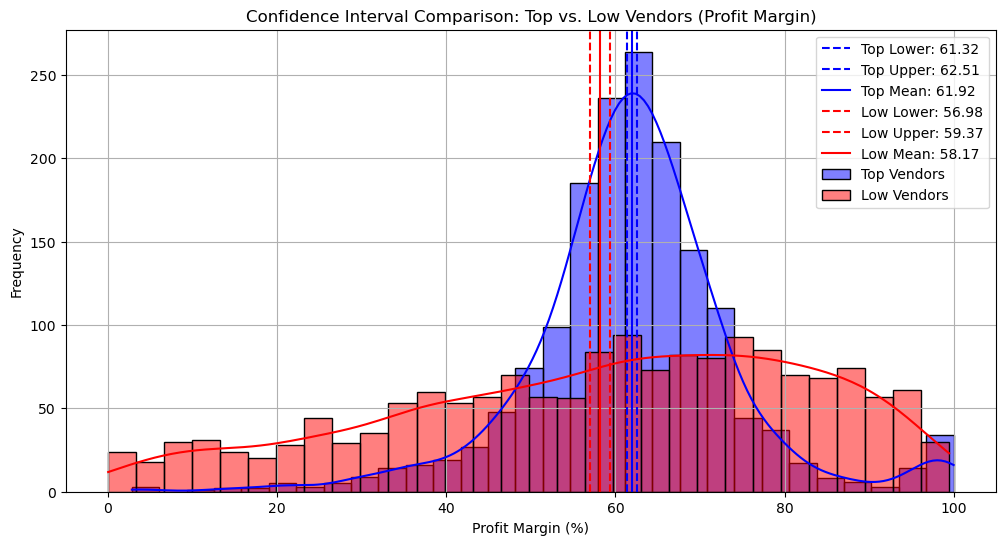

In [168]:
# Compute confidence intervals directly from the Series
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plot
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [169]:
from scipy.stats import ttest_ind

# Define thresholds
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Split into top and low vendors based on TotalSalesDollars
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test (Welch's t-test)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("⚪ Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: 5.5022, P-Value: 0.0000
✅ Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
